In [2]:
import glob
import cv2
import numpy as np

In [36]:

def show(frame, frame_no):
  cv2.imshow('Frame', frame)
  # print(frame.shape)


def write(frame, frame_no):
  frame_no_padded = str(frame_no).rjust(3, '0')
  path = f'./output_folder/{frame_no_padded}.png'
  print(f'Writing to path {path}')
  cv2.imwrite(path, frame)


def read_and_process(filename, frame_action):
  cap = cv2.VideoCapture(filename)
  frame_no = 0

  if (cap.isOpened() == False):
    print("Error opening video stream or file")

  while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
      frame_action(frame, frame_no)
      if cv2.waitKey(25) and 0xFF == ord('q'):
        break
    else:
      break
    frame_no += 1

  cap.release()
  cv2.destroyAllWindows()



# Displaying all videos

In [37]:

video_filenames = glob.glob('DeepfakeTIMIT/higher_quality/**/*.avi')
for filename in video_filenames:
  print("Displaying file: " + filename)
  read_and_process(filename, show)


Displaying file: DeepfakeTIMIT/higher_quality/mrjo0/sx374-video-mstk0.avi
Displaying file: DeepfakeTIMIT/higher_quality/mrjo0/sx284-video-mstk0.avi
Displaying file: DeepfakeTIMIT/higher_quality/mrjo0/sx194-video-mstk0.avi


KeyboardInterrupt: 

# Write videos

In [43]:
import os

fake_video_to_write = 'DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1.avi'
real_video_to_write = 'VidTIMIT/fadg0/sa1.avi'
output_folder = 'output_folder'

def save_video_frames(path, output_folder):
    target_folder = os.path.join(output_folder, path)
    image_prefix = os.path.splitext(target_folder)[0]
    
    def write_to_disk(frame, frame_no):
        frame_no_padded = str(frame_no).rjust(3, '0')
        path = f'{image_prefix}/{frame_no_padded}.png'
        print(f'Writing to path {path}')
        
        if not os.path.exists(image_prefix):
            os.makedirs(image_prefix)
        cv2.imwrite(path, frame)
    
    read_and_process(path, write_to_disk)
    return image_prefix
        
    
    
fake_path_prefix = save_video_frames(fake_video_to_write, output_folder)
real_path_prefix = save_video_frames(real_video_to_write, output_folder)

print(fake_path_prefix)
print(real_path_prefix)



Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/000.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/001.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/002.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/003.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/004.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/005.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/006.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/007.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/008.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/009.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/010.png
Writing to path outpu

Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/094.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/095.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/096.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/097.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/098.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/099.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/100.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/101.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/102.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/103.png
Writing to path output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/104.png
Writing to path outpu

Writing to path output_folder/VidTIMIT/fadg0/sa1/105.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/106.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/107.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/108.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/109.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/110.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/111.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/112.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/113.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/114.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/115.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/116.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/117.png
Writing to path output_folder/VidTIMIT/fadg0/sa1/118.png
output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1
output_folder/VidTIMIT/fadg0/sa1


# Comparing images

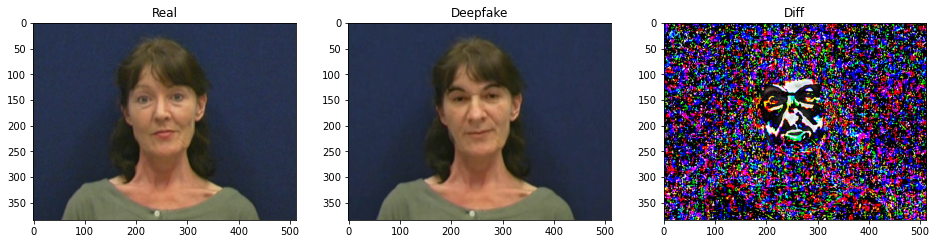

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

fake_img_path = os.path.join(fake_path_prefix, '001.png')
real_img_path = os.path.join(real_path_prefix, '001.png')

def compare_images(real_img_path, fake_img_path):
    real = cv2.imread(real_img_path)
    fake = cv2.imread(fake_img_path)
    
    real_img = cv2.cvtColor(real, cv2.COLOR_BGR2RGB)
    fake_img = cv2.cvtColor(fake, cv2.COLOR_BGR2RGB)
    
#     print(real_img.shape)
#     print(fake_img.shape)
    img_diff = None
    if real_img.shape == fake_img.shape:
        image_diff = real_img - fake_img
#     print(image_diff)

    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    plt.imshow(real_img)
    plt.title('Real')

    plt.subplot(1,3,2)
    plt.title('Deepfake')
    plt.imshow(fake_img)

    if image_diff is not None:
        plt.subplot(1,3,3)
        plt.title('Diff')
        plt.imshow(image_diff)

    plt.show()

compare_images(real_img_path, fake_img_path)